In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("TraningInputFile.csv")

In [3]:
train_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,261,46,156636,9/10/2000,IN,100/300,1000,870.55,0,465631,...,3,?,80280,13380,13380,53520,Chevrolet,Tahoe,2013,N
496,321,44,284143,4/23/2008,IL,500/1000,2000,1344.56,6000000,443344,...,2,NO,4680,520,0,4160,Accura,MDX,1999,N
497,0,32,740518,2/18/2011,OH,500/1000,1000,1377.04,0,441363,...,1,NO,39720,6620,6620,26480,Accura,MDX,2002,N
498,405,58,445289,4/24/2012,IL,250/500,500,1237.88,0,462683,...,0,?,63580,5780,5780,52020,Mercedes,ML350,1997,Y


In [4]:
train_df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [5]:
train_df.drop(columns=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','age','total_claim_amount'],
              inplace=True)
train_df.replace("?", np.NaN, inplace=True)

In [6]:
from pandas_profiling import ProfileReport
ProfileReport(train_df).to_file("Training_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
train_df["collision_type"].fillna(train_df["collision_type"].mode()[0], inplace=True)
train_df["property_damage"].fillna(train_df["property_damage"].mode()[0], inplace=True)
train_df["police_report_available"].fillna(train_df["police_report_available"].mode()[0], inplace=True)

In [8]:
from sklearn.preprocessing import StandardScaler
num_df = train_df[['months_as_customer', 'policy_deductable', 'umbrella_limit',
                          'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                          'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim',
                          'property_claim',
                          'vehicle_claim']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)
scaled_num_df = pd.DataFrame(data=scaled_data, columns=num_df.columns)

In [9]:
cat_df = train_df.select_dtypes(include=['object']).copy()
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300': 1, '250/500': 2.5, '500/1000': 5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map(
                {'JD': 1, 'High School': 2, 'College': 3, 'Masters': 4, 'Associate': 5, 'MD': 6, 'PhD': 7})
cat_df['incident_severity'] = cat_df['incident_severity'].map(
                {'Trivial Damage': 1, 'Minor Damage': 2, 'Major Damage': 3, 'Total Loss': 4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE': 0, 'MALE': 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO': 0, 'YES': 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO': 0, 'YES': 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N': 0, 'Y': 1})
cols_to_drop=['policy_csl', 'insured_education_level', 'incident_severity', 'insured_sex',
                                            'property_damage', 'police_report_available', 'fraud_reported']
for col in cat_df.drop(columns=cols_to_drop).columns:
    cat_df = pd.get_dummies(cat_df, columns=[col], prefix=[col], drop_first=True)
train_df = pd.concat([scaled_num_df, cat_df], axis=1)

In [10]:
train_df

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,1.077587,-0.305837,-0.499046,1.031427,0.939583,-1.009651,-0.840597,0.012329,0.523003,-0.226720,...,0,0,1,0,0,1,0,0,0,1
1,0.210216,1.295405,1.583782,-0.879008,0.939583,-0.565914,-0.840597,-1.220549,-1.299307,-1.377713,...,0,0,0,1,1,0,0,0,0,1
2,-0.605113,1.295405,1.583782,0.379083,0.939583,-0.713826,1.118836,1.245207,1.434158,0.012317,...,0,0,0,0,1,0,0,0,0,1
3,0.453080,1.295405,2.000348,0.873718,-1.319639,-1.009651,-0.840597,0.012329,0.523003,-0.260868,...,0,0,1,0,0,0,0,0,0,1
4,0.210216,-0.305837,2.000348,1.486634,-0.725869,1.209038,-0.840597,-1.220549,-0.388152,-1.273260,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.496448,-0.305837,-0.499046,-0.879008,-0.848968,1.061125,-0.840597,-1.220549,1.434158,1.153268,...,0,0,1,0,1,0,0,0,1,0
496,1.016871,1.295405,2.000348,-0.879008,-0.476051,-0.713826,-0.840597,0.012329,0.523003,-1.429940,...,0,0,0,1,1,0,0,0,0,1
497,-1.767389,-0.305837,-0.499046,1.321756,-0.548462,-0.861739,2.098552,0.012329,-0.388152,-0.204624,...,1,0,0,0,1,0,0,0,0,0
498,1.745462,-1.106459,-0.499046,-0.879008,-0.758454,-0.122176,-0.840597,-1.220549,-1.299307,-0.373356,...,0,0,1,0,0,0,0,0,0,1


In [11]:
X = train_df.drop(columns=["fraud_reported"])
y = train_df["fraud_reported"]

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'WCSS')

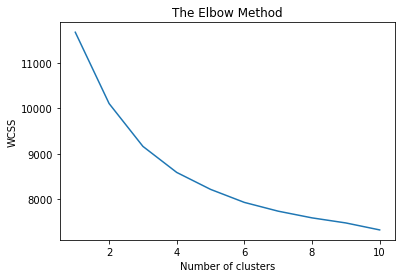

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [14]:
from kneed import KneeLocator
number_of_clusters = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing').knee
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
X["Cluster"] = kmeans.fit_predict(X)
X["Label"] = y

In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score

In [16]:
def get_best_params_for_xgboost(train_x, train_y):
    param_grid_xgboost = {
        "n_estimators": [50, 100, 130],
        "max_depth": range(3, 11, 1),
        "random_state": [0, 50, 100]
    }
    grid = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic'), param_grid_xgboost, cv=2, n_jobs=-1)
    grid.fit(train_x, train_y)
    random_state = grid.best_params_['random_state']
    max_depth = grid.best_params_['max_depth']
    n_estimators = grid.best_params_['n_estimators']
    xgbc = xgb.XGBClassifier(random_state=random_state, max_depth=max_depth, n_estimators=n_estimators, n_jobs=-1)
    xgbc.fit(train_x, train_y)
    return xgbc

In [17]:
def get_best_params_for_naive_bayes(train_x, train_y):
    param_grid = {"var_smoothing": [1e-9, 0.1, 0.001, 0.5, 0.05, 0.01, 1e-8, 1e-7, 1e-6, 1e-10, 1e-11]}
    grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=3, n_jobs=-1)
    grid.fit(train_x, train_y)
    var_smoothing = grid.best_params_['var_smoothing']
    gnb = GaussianNB(var_smoothing=var_smoothing)
    gnb.fit(train_x, train_y)
    return gnb

In [18]:
def get_best_params_for_random_forest(train_x, train_y):
    param_grid = {
        "n_estimators": [10, 50, 100, 130],
        "criterion": ['gini', 'entropy'],
        "max_depth": range(2, 4, 1),
        "max_features": ['auto', 'log2']
    }
    grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
    grid.fit(train_x, train_y)
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    max_features = grid.best_params_['max_features']
    n_estimators = grid.best_params_['n_estimators']
    clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                                     max_features=max_features)
    clf.fit(train_x, train_y)
    return clf

In [19]:
def get_best_model(train_x, train_y, test_x, test_y):
    xgboost_model = get_best_params_for_xgboost(train_x, train_y)
    prediction_xgboost = xgboost_model.predict(test_x)
    if len(test_y.unique()) == 1:
        xgboost_score = accuracy_score(test_y, prediction_xgboost)
    else:
        xgboost_score = roc_auc_score(test_y, prediction_xgboost)
    naive_bayes = get_best_params_for_naive_bayes(train_x, train_y)
    prediction_naive_bayes = naive_bayes.predict(test_x)
    if len(test_y.unique()) == 1:
        naive_bayes_score = accuracy_score(test_y, prediction_naive_bayes)
    else:
        naive_bayes_score = roc_auc_score(test_y, prediction_naive_bayes)
    random_forest = get_best_params_for_random_forest(train_x, train_y)
    prediction_random_forest = random_forest.predict(test_x)
    if len(test_y.unique()) == 1:
        random_forest_score = accuracy_score(test_y, prediction_random_forest)
    else:
        random_forest_score = roc_auc_score(test_y, prediction_random_forest)
    if naive_bayes_score < xgboost_score and xgboost_score > random_forest_score:
        return 'XGBoost', xgboost_model
    elif naive_bayes_score > xgboost_score and naive_bayes_score > random_forest_score:
        return 'NaiveBayes', naive_bayes
    else:
        return "RandomForest", random_forest

In [20]:
list_of_clusters = X['Cluster'].unique()
list_of_models = []
for i in list_of_clusters:
    cluster_data = X[X['Cluster'] == i]
    cluster_features = cluster_data.drop(['Label', 'Cluster'], axis=1)
    cluster_label = cluster_data['Label']
    X_train, X_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=1 / 3,
                                                                random_state=0)
    best_model_name, best_model = get_best_model(X_train, y_train, X_test, y_test)
    print(f"Cluster number {i + 1}: {best_model}")
    list_of_models.append(best_model)

Cluster number 4: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)
Cluster number 3: RandomForestClassifier(max_depth=2, n_estimators=10)
Cluster number 1: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytr

In [21]:
test_df = pd.read_csv("TestingInputFile.csv")

In [22]:
test_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,1,2,YES,71610,6510,13020,52080,Saab,92x,2004
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,0,?,5070,780,780,3510,Mercedes,E400,2007
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,0,1,NO,6500,1300,650,4550,Accura,RSX,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,261,46,156636,9/10/2000,IN,100/300,1000,870.55,0,465631,...,0,3,?,80280,13380,13380,53520,Chevrolet,Tahoe,2013
496,321,44,284143,4/23/2008,IL,500/1000,2000,1344.56,6000000,443344,...,1,2,NO,4680,520,0,4160,Accura,MDX,1999
497,0,32,740518,2/18/2011,OH,500/1000,1000,1377.04,0,441363,...,1,1,NO,39720,6620,6620,26480,Accura,MDX,2002
498,405,58,445289,4/24/2012,IL,250/500,500,1237.88,0,462683,...,0,0,?,63580,5780,5780,52020,Mercedes,ML350,1997


In [24]:
test_df.drop(columns=['policy_number', 'policy_bind_date', 'policy_state', 'insured_zip',
                                                'incident_location', 'incident_date', 'incident_state', 'incident_city',
                                                'insured_hobbies', 'auto_make', 'auto_model', 'auto_year', 'age',
                                                'total_claim_amount'], inplace=True)

In [25]:
test_df.replace("?", np.NaN, inplace=True)

In [34]:
dict(test_df.isnull().sum())

{'months_as_customer': 0,
 'policy_csl': 0,
 'policy_deductable': 0,
 'policy_annual_premium': 0,
 'umbrella_limit': 0,
 'insured_sex': 0,
 'insured_education_level': 0,
 'insured_occupation': 0,
 'insured_relationship': 0,
 'capital-gains': 0,
 'capital-loss': 0,
 'incident_type': 0,
 'collision_type': 90,
 'incident_severity': 0,
 'authorities_contacted': 0,
 'incident_hour_of_the_day': 0,
 'number_of_vehicles_involved': 0,
 'property_damage': 187,
 'bodily_injuries': 0,
 'witnesses': 0,
 'police_report_available': 176,
 'injury_claim': 0,
 'property_claim': 0,
 'vehicle_claim': 0}

In [35]:
test_df["collision_type"].fillna(test_df["collision_type"].mode()[0], inplace=True)
test_df["property_damage"].fillna(test_df["property_damage"].mode()[0], inplace=True)
test_df["police_report_available"].fillna(test_df["police_report_available"].mode()[0], inplace=True)

In [36]:
num_df = test_df[['months_as_customer', 'policy_deductable', 'umbrella_limit',
                          'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                          'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim',
                          'property_claim',
                          'vehicle_claim']]
scaled_data = scaler.transform(num_df)
scaled_num_df = pd.DataFrame(data=scaled_data, columns=num_df.columns)

In [37]:
cat_df = test_df.select_dtypes(include=['object']).copy()
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300': 1, '250/500': 2.5, '500/1000': 5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map(
                {'JD': 1, 'High School': 2, 'College': 3, 'Masters': 4, 'Associate': 5, 'MD': 6, 'PhD': 7})
cat_df['incident_severity'] = cat_df['incident_severity'].map(
                {'Trivial Damage': 1, 'Minor Damage': 2, 'Major Damage': 3, 'Total Loss': 4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE': 0, 'MALE': 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO': 0, 'YES': 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO': 0, 'YES': 1})
cols_to_drop=['policy_csl', 'insured_education_level', 'incident_severity', 'insured_sex',
                                            'property_damage', 'police_report_available']
for col in cat_df.drop(columns=cols_to_drop).columns:
    cat_df = pd.get_dummies(cat_df, columns=[col], prefix=[col], drop_first=True)
test_df = pd.concat([scaled_num_df, cat_df], axis=1)

In [42]:
test_df

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,clusters
0,1.077587,-0.305837,-0.499046,1.031427,0.939583,-1.009651,-0.840597,0.012329,0.523003,-0.226720,...,0,1,0,0,1,0,0,0,1,3
1,0.210216,1.295405,1.583782,-0.879008,0.939583,-0.565914,-0.840597,-1.220549,-1.299307,-1.377713,...,0,0,1,1,0,0,0,0,1,2
2,-0.605113,1.295405,1.583782,0.379083,0.939583,-0.713826,1.118836,1.245207,1.434158,0.012317,...,0,0,0,1,0,0,0,0,1,3
3,0.453080,1.295405,2.000348,0.873718,-1.319639,-1.009651,-0.840597,0.012329,0.523003,-0.260868,...,0,1,0,0,0,0,0,0,1,3
4,0.210216,-0.305837,2.000348,1.486634,-0.725869,1.209038,-0.840597,-1.220549,-0.388152,-1.273260,...,0,0,1,1,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.496448,-0.305837,-0.499046,-0.879008,-0.848968,1.061125,-0.840597,-1.220549,1.434158,1.153268,...,0,1,0,1,0,0,0,1,0,3
496,1.016871,1.295405,2.000348,-0.879008,-0.476051,-0.713826,-0.840597,0.012329,0.523003,-1.429940,...,0,0,1,1,0,0,0,0,1,2
497,-1.767389,-0.305837,-0.499046,1.321756,-0.548462,-0.861739,2.098552,0.012329,-0.388152,-0.204624,...,0,0,0,1,0,0,0,0,0,1
498,1.745462,-1.106459,-0.499046,-0.879008,-0.758454,-0.122176,-0.840597,-1.220549,-1.299307,-0.373356,...,0,1,0,0,0,0,0,0,1,3


In [44]:
clusters=kmeans.predict(test_df)
test_df['clusters']=clusters
clusters=test_df['clusters'].unique()
predictions=[]
for i in clusters:
    cluster_data= test_df[test_df['clusters']==i]
    cluster_data = cluster_data.drop(['clusters'],axis=1)
    model = list_of_models[i]
    result=(model.predict(cluster_data))
    for res in result:
        if res==0:
            predictions.append('N')
        else:
            predictions.append('Y')
final= pd.DataFrame(list(zip(predictions)),columns=['Predictions'])
final.to_csv("Predictions.csv",header=True,mode='a+')